In [1]:
!pip install ipywidgets

In [2]:
import ipywidgets as widgets
import duckietown_code_utils as dcu
import cv2
import numpy as np
from matplotlib import pyplot as plt


DEBUG:commons:version: 6.2.3 *
DEBUG:typing:version: 6.2.3
DEBUG:geometry:PyGeometry-z6 version 2.1.3 path /Volumes/work3/DT/dt-env/dt-env-developer/z/geometry/src


Box(children=(IntRangeSlider(value=(0, 255), description='H', max=255), IntRangeSlider(value=(0, 255), descrip…

Label(value="The initial values are {'H': (0, 255), 'S': (0, 255), 'V': (0, 255)}")

computing
computing [255 255 255]


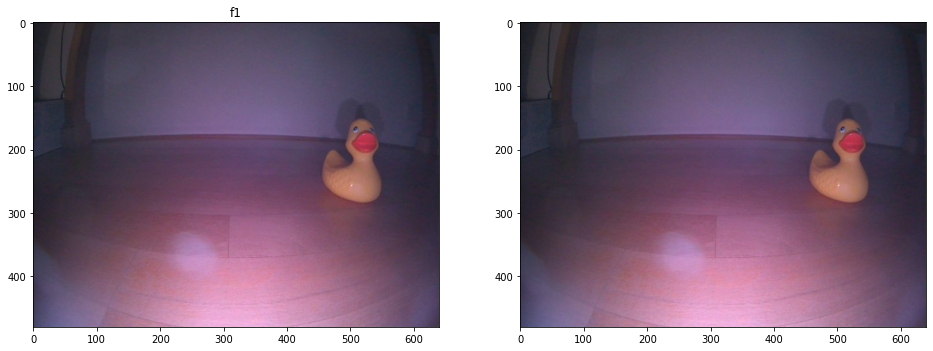

done


In [12]:
titles = ['H', 'S', 'V']
fn = '../../assets/samples/big-duck/big-duck-08.jpg'

frame0 = dcu.rgb_from_jpg_fn(fn)
sliders = {}
from functools import partial


def update_caption():
    values = get_values()
    caption.value  = f'The values are {values}'

def on_slider_change(index: int, change):
    show_images()
    update_caption()

for i, title in enumerate(titles):
    slider = widgets.IntRangeSlider(
    value=[0, 255],
    min=0,
    max=255,
    step=1,
    description=title,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d')
    sliders[title] = slider
    slider.observe(partial(on_slider_change, i))

def get_values():
    return {k: _.value for k, _ in sliders.items()}


box = widgets.Box(list(sliders.values()))
caption = widgets.Label(value=f'The initial values are {get_values()}')

display(box, caption)
f, ax = plt.subplots(1, 2, figsize=(16,6))
class Tmp:
    i = 0

def show_images():
    print('computing')
    frame = frame0
    hsv = cv2.cvtColor(frame0, cv2.COLOR_BGR2HSV)
    values = get_values()
    lower_hsv = np.array([values['H'][0],values['S'][0],values['V'][0],])
    higher_hsv = np.array([values['H'][1],values['S'][1],values['V'][1],])
    print('computing', higher_hsv)
    # Apply the cv2.inrange method to create a mask
    mask = cv2.inRange(hsv, lower_hsv, higher_hsv)
    # Apply the mask on the image to extract the original color
    frame = cv2.bitwise_and(frame, frame, mask=mask)

    ax[0].imshow(frame0)
    ax[1].imshow(frame)

    Tmp.i += 1
    ax[0].set_title(f'f{Tmp.i}')
    plt.show()
    print('done')

show_images()






In [4]:


caption2 = widgets.Label(value='The slider value is in its initial position.')
slider2 = widgets.IntSlider(min=-5, max=5, value=1, description='Slider')
def handle_slider_change(change):
    caption2.value = 'The slider value is ' + (
        'negative' if change.new < 0 else 'nonnegative'
    )

slider2.observe(handle_slider_change, names='value')

display(caption2, slider2)

Label(value='The slider value is in its initial position.')

IntSlider(value=1, description='Slider', max=5, min=-5)